<a href="https://colab.research.google.com/github/monali0802/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", header=None)
print(data)

       0      1      2      3      4    ...    96     97     98     99     100
0       74  -7.82   8.79  -9.66  -8.16  ...  99.00  -5.63  99.00  99.00  99.00
1      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
2       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
4       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24978  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24979   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24980   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24982   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24983 rows x 101 columns]


In [4]:
arr = data
print(arr.shape)

(24983, 101)


In [5]:
arr.replace(99.00, np.nan, inplace=True)
print(arr)



         0     1     2     3     4     5    ...   95    96    97    98    99    100
0       74.0 -7.82  8.79 -9.66 -8.16 -7.52  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      100.0  4.08 -0.29  6.36  4.37 -2.38  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       49.0   NaN   NaN   NaN   NaN  9.03  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       48.0   NaN  8.35   NaN   NaN  1.80  ...   NaN   NaN   NaN   NaN   NaN   NaN
4       91.0  8.50  4.61 -4.17 -5.39  1.36  ...  5.73  1.55  3.11  6.55  1.80  1.60
...      ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  100.0  0.44  7.43  9.08  2.33  3.20  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979   91.0  9.13 -8.16  8.59  9.08  0.87  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   39.0   NaN   NaN   NaN   NaN -7.77  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   37.0   NaN   NaN   NaN   NaN -9.71  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982   72.0  2.43  2.67 -3.98  4.27 -2.28  ...   NaN   NaN   NaN   NaN   Na

In [6]:
arr_new = arr.drop(columns=[0], axis=1)
print(arr_new)

        1     2     3     4     5     6    ...   95    96    97    98    99    100
0     -7.82  8.79 -9.66 -8.16 -7.52 -8.50  ...   NaN   NaN -5.63   NaN   NaN   NaN
1      4.08 -0.29  6.36  4.37 -2.38 -9.66  ... -0.19 -2.14  3.06  0.34 -4.32  1.07
2       NaN   NaN   NaN   NaN  9.03  9.27  ...   NaN   NaN   NaN   NaN   NaN   NaN
3       NaN  8.35   NaN   NaN  1.80  8.16  ...   NaN   NaN   NaN   NaN   NaN   NaN
4      8.50  4.61 -4.17 -5.39  1.36  1.60  ...  5.73  1.55  3.11  6.55  1.80  1.60
...     ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
24978  0.44  7.43  9.08  2.33  3.20  6.75  ...  8.45  9.03  6.55  8.69  8.79  7.43
24979  9.13 -8.16  8.59  9.08  0.87 -8.93  ...  9.22 -8.20 -7.23 -8.59  9.13  8.45
24980   NaN   NaN   NaN   NaN -7.77   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24981   NaN   NaN   NaN   NaN -9.71   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
24982  2.43  2.67 -3.98  4.27 -2.28  7.33  ...   NaN   NaN   NaN   NaN   NaN   NaN

[24

In [7]:
# ranking = new_arr.rank(axis=1, method='average')
# print(ranking)
mean_result = arr_new.mean(axis=0)

print(mean_result)

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64


In [8]:
print(mean_result.min() )
print("Worst rated joke: ",mean_result.idxmin() )
print(mean_result.max() )
print("Best rated joke: ",mean_result.idxmax() )


-3.8338796373689923
Worst rated joke:  58
3.6650848950824937
Best rated joke:  50


In [9]:
rated = np.where(arr_new!=99)
print(len(rated[0]), rated[1].shape)

2498300 (2498300,)


In [11]:
def replace_new(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(~np.isnan(orig))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])


In [12]:

new_arr, idx = replace_new(arr_new.values, 0.1)

print(new_arr)
print(idx)
arr_new.values[idx[0][0], idx[1][0]]

new_arr[idx[0][0], idx[1][0]]

[[-7.82  8.79 -9.66 ...   nan   nan   nan]
 [ 4.08 -0.29  6.36 ...  0.34 -4.32  1.07]
 [  nan   nan   nan ...   nan   nan   nan]
 ...
 [  nan   nan   nan ...   nan   nan   nan]
 [  nan   nan   nan ...   nan   nan   nan]
 [ 2.43  2.67 -3.98 ...   nan   nan   nan]]
(array([ 3870,  6556, 13915, ..., 15306, 18154, 12526]), array([82, 59, 48, ..., 62, 55, 17]))


99.0

In [13]:
n_latent_factors = 2

user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [14]:
latent_user_preferences

array([[0.27752866, 0.86030279],
       [0.52610982, 0.10509281],
       [0.52419282, 0.77308398],
       ...,
       [0.77503754, 0.13998845],
       [0.73860059, 0.35479503],
       [0.26835354, 0.92712606]])

In [15]:
latent_item_features

array([[0.49741059, 0.65168929],
       [0.46621201, 0.37959498],
       [0.74682813, 0.05884138],
       [0.19120272, 0.29377758],
       [0.99694514, 0.74771914],
       [0.43161173, 0.11400783],
       [0.10173474, 0.59618448],
       [0.76374184, 0.5373185 ],
       [0.82314926, 0.09836359],
       [0.40280418, 0.94230518],
       [0.6110354 , 0.08313709],
       [0.46379224, 0.25095829],
       [0.21139323, 0.02351338],
       [0.19707023, 0.16251687],
       [0.8506981 , 0.85005884],
       [0.60057203, 0.81713947],
       [0.00342202, 0.33217057],
       [0.16746881, 0.53015039],
       [0.64805359, 0.88165437],
       [0.76645673, 0.09468738],
       [0.80156302, 0.45735588],
       [0.4485111 , 0.67175959],
       [0.74196989, 0.38437531],
       [0.98990238, 0.16859075],
       [0.58404436, 0.15151676],
       [0.67185391, 0.07195063],
       [0.17168154, 0.16606224],
       [0.64628287, 0.7707324 ],
       [0.58356508, 0.03497521],
       [0.00500158, 0.76770891],
       [0.

In [17]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating) and rating != 99.00:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/1:	MSE=26.263489
Iteration 0/1:	MSE=25.282547
Iteration 0/1:	MSE=24.996488
Iteration 0/1:	MSE=24.781097
Iteration 0/1:	MSE=24.572266
Iteration 0/1:	MSE=24.361761
Iteration 0/1:	MSE=24.148877
Iteration 0/1:	MSE=23.934426
Iteration 0/1:	MSE=23.719649
Iteration 0/1:	MSE=23.505918


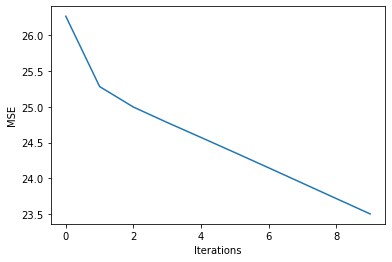

In [18]:
num_iter = 10
hist = []
for _ in range(num_iter):
  hist.append(sgd(1))  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0 , num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [19]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[1.2522527 , 0.77963776, 0.64929208, ..., 1.42474529, 0.45031327,
        2.03619521],
       [0.57616221, 0.35113414, 0.44667737, ..., 0.66779946, 0.28777291,
        0.84962436],
       [2.0085736 , 1.24273321, 1.19335201, ..., 2.29784895, 0.80503444,
        3.17642114],
       ...,
       [0.73012692, 0.44380497, 0.58870368, ..., 0.84813209, 0.3770178 ,
        1.06330175],
       [1.09892718, 0.67425453, 0.76354931, ..., 1.26637437, 0.50071855,
        1.67263708],
       [1.63958043, 1.01960713, 0.87308616, ..., 1.86733104, 0.6021066 ,
        2.652459  ]])

In [20]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
# print(pd.DataFrame(values))
comparison_data = pd.DataFrame(values)
comparison_data.columns = arr_new.columns

In [21]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 1.2522526998473495)","(8.79, 0.7796377610718126)","(-9.66, 0.6492920786292087)","(-8.16, -0.7662344111514603)","(-7.52, 0.7846569434610372)","(-8.5, 2.102405560967947)","(-9.85, -0.039003933672212485)","(4.17, -0.3567401606849765)","(-8.98, -0.22421055512653754)","(-4.76, 1.6562486795503195)","(-8.5, 2.165160965033541)","(-6.75, 2.0479314480046518)","(-7.18, -1.4013758806447845)","(8.45, 2.0647877955918466)","(-7.18, -1.5043924810248697)","(-7.52, -2.7915407885063854)","(-7.43, -0.6836052085548732)","(-9.81, -0.35852932970295825)","(-9.85, 0.580893125959339)","(-9.85, -0.4540164713588203)","(-9.37, 2.6527281738800705)","(1.5, 1.4768473053649758)","(-4.37, 0.6178571516420435)","(-9.81, -1.218940797288747)","(-8.5, 0.976178293997135)","(1.12, 1.8944310821059782)","(7.82, 3.5348193882621652)","(2.86, 2.088157502731383)","(9.13, 3.3890397930857663)","(-7.43, 0.23806008144903382)","(2.14, 2.730621084579912)","(-4.08, 3.4608214805107718)","(-9.08, -0.6574932744560092)","(7.82, 1.5524964318320162)","(99.0, 3.3822843568719865)","(4.95, 3.5902680471804183)","(-9.17, -0.8161682891766658)","(-8.4, 1.6421941615266893)","(-8.4, 1.7691615507281286)","(-8.4, 1.612073781958445)",...,"(8.59, 2.984504011984995)","(3.59, 3.396251501842568)","(-6.84, 0.9691315518401494)","(-9.03, -0.18796004373236164)","(2.82, 2.8652106815835365)","(-1.36, 3.067533077227989)","(-9.08, -0.3549382050535043)","(8.3, 3.0851241952898825)","(5.68, 3.1298991066387463)","(-4.81, 1.0716620887548851)","(nan, -0.029815135493728953)","(nan, 3.1100086329561596)","(nan, 1.85591511568592)","(nan, -0.9343632935708678)","(nan, 0.3909870426694457)","(nan, 2.8046382216420915)","(nan, 1.4008634053257984)","(-9.42, 2.3386868891542587)","(nan, 0.9198319809324802)","(nan, 1.901515432498524)","(nan, 2.366742487877069)","(-7.72, 1.3040432590697077)","(nan, 2.426983268184584)","(nan, 1.3669995313147911)","(nan, 1.595481231237267)","(nan, 0.6640901364943405)","(nan, 2.321958641926666)","(nan, 2.4663216241175085)","(nan, 3.7930859213228474)","(nan, 1.107609041322007)","(2.82, 2.2463443775815533)","(nan, 1.7843232198723191)","(nan, 2.840391592685204)","(nan, 1.4171960149076583)","(nan, 1.575210789036352)","(nan, 1.9927950446022924)","(-5.63, 2.1972960153581838)","(nan, 1.4247452910208978)","(nan, 0.4503132710494804)","(nan, 2.036195207400945)"
1,"(4.08, 0.5761622066976603)","(-0.29, 0.3511341430943857)","(6.36, 0.4466773658248303)","(4.37, -0.4606686148718147)","(-2.38, 0.4242281850258268)","(-9.66, 1.0565123525454354)","(-0.73, -0.01325382166960274)","(-5.34, -0.20385946234008198)","(8.88, 0.006800746650878825)","(9.22, 0.728132604418777)","(99.0, 1.2045779421727913)","(8.64, 1.0864277784346577)","(4.42, -0.7830716193388261)","(7.43, 1.0198340158998689)","(4.56, -0.7883581147145396)","(-0.97, -1.4238278532951452)","(4.66, -0.3657634941880349)","(-0.68, -0.17792294748053952)","(3.3, 0.27814838794523944)","(-1.21, -0.23118290086872315)","(0.87, 1.3433441108935595)","(8.64, 0.6801722663090903)","(99.0, 0.3063940436629501)","(9.17, -0.5357943438073851)","(0.05, 0.489034986777306)","(7.57, 0.988495160038208)","(4.71, 1.7802036031296038)","(0.87, 1.0237207486250277)","(-0.39, 1.68765516525204)","(6.99, 0.040687988026930494)","(6.5, 1.365049432307654)","(-0.92, 1.807909162489376)","(7.14, -0.4159042493762847)","(9.03, 0.7338119411086613)","(-1.8, 1.76393965831812)","(0.73, 1.77894361449717)","(7.09, -0.4892321367507423)","(3.4, 0.8958678275163573)","(-0.87, 0.839372530443996)","(7.91, 0.8039988575826702)",...,"(-6.7, 1.4824131164514829)","(-3.35, 1.698441284402416)","(-9.03, 0.38291462764093326)","(4.47, -0.1360574152889117)","(4.08, 1.3901656479365765)","(99.0, 1.4686428042495223)","(99.0, -0.158077813085202)","(1.12, 1.5208452677591422)","(0.78, 1.5480

In [23]:
df_users = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Users')
df_movies = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/movies_latent_factors.xlsx",sheet_name='Items')
print(df_users)
print(df_movies)

    User   Factor1   Factor2   Factor3  ...  Factor12  Factor13  Factor14  Factor15
0   4768 -0.204024  0.161079 -0.090447  ...  0.355404  0.007108 -0.118663 -0.039125
1    156 -0.189652 -0.178979 -0.091490  ... -0.048606  0.045916  0.113671  0.179873
2   5323 -0.115308 -0.090886 -0.053129  ... -0.019460  0.108372  0.054471 -0.109552
3    174 -0.227462 -0.272532 -0.017231  ... -0.082396  0.036767 -0.165438  0.050692
4   4529 -0.014616 -0.102218 -0.107935  ... -0.132836 -0.039897  0.129063  0.102669
5    783 -0.020301 -0.031919 -0.036955  ...  0.059725 -0.021647  0.039873 -0.061857
6   3878 -0.091462  0.215879 -0.180453  ...  0.214467  0.189250  0.065990  0.102776
7    768  0.000819 -0.009229 -0.019228  ... -0.010051 -0.002108  0.043223 -0.006670
8   4469 -0.030528 -0.011537 -0.042822  ...  0.010926  0.024400  0.005318 -0.007983
9   1882 -0.083093 -0.029160  0.013748  ... -0.113364 -0.021325  0.181508  0.022357
10  4997 -0.185443 -0.276496 -0.781275  ...  0.103116 -0.100563  0.100164  0

In [33]:
new_df_movies = df_movies.drop(columns='Title')
new_df_movies.shape


(100, 16)

In [63]:
# df_users.iloc[:, 15:].values[0]
# X = df_users.iloc[1:]
# y = new_df_movies.iloc[:, :-1]
# print(X)
# print(y.shape)
# X.dot(y)

In [46]:
# Which 3 movies would you recommend to User 174?
# user_pref = df_users[df_users['User'] == 5338].iloc[:, -num_factors:].values[0]
# item_feat = df_movies.iloc[:, -num_factors:].values


In [ ]:

users = pd.DataFrame(df_users)
tmp_user = users
print(tmp_user[users['User'] == 5338]['Factor3'])
# []

17   -0.13698
Name: Factor3, dtype: float64


In [39]:
items = pd.DataFrame(df_movies)
tmp_item = items
print(tmp_item[items['Movie ID'] == 85]['Factor3'])


9    0.489161
Name: Factor3, dtype: float64


In [45]:
print(tmp_item[items['Factor12'] == max(items['Factor12'])])
print(tmp_item[items['Movie ID'] == 672]['Title'])

    Movie ID  ...  Factor15
58       672  ...  0.336602

[1 rows x 17 columns]
58    Harry Potter and the Chamber of Secrets (2002)
Name: Title, dtype: object


In [ ]:
from sklearn.svm import SVC

np.set_printoptions(precision=3)